In [185]:
import numpy as np
import pandas as pd
import os

import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing, metrics, model_selection, neural_network, linear_model, ensemble
import matplotlib.pyplot as plt
from scipy import stats

In [88]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [11]:
if os.path.exists('data'):
    train_df = pd.read_csv(os.path.join(os.path.abspath('.'), 
                                        "data", 
                                        "train.csv"))
    test_df = pd.read_csv(os.path.join(os.path.abspath('.'), 
                                        "data", 
                                        "test.csv"))

In [22]:
print(f"Shape of the train_df: {train_df.shape} \nShape of the test_df: {test_df.shape}")

Shape of the train_df: (1760, 172) 
Shape of the test_df: (16626, 172)


In [37]:
#Capturing the columns names
features = list(train_df.columns)

### We note that labels "id", "genus" and "species" are present

In [38]:
features.remove("id")
features.remove("genus")
features.remove("species")

In [189]:
train_df.species.unique()

array(['flammea', 'palustris', 'schoenobaenus', 'scirpaceus', 'caudatus',
       'arvensis', 'pratensis', 'trivialis', 'apus', 'canadensis',
       'alpina', 'europaeus', 'carduelis', 'familiaris', 'chloris',
       'ridibundus', 'monedula', 'livia', 'oenas', 'palumbus', 'corax',
       'corone', 'frugilegus', 'canorus', 'caeruleus', 'urbicum', 'major',
       'martius', 'calandra', 'citrinella', 'schoeniclus', 'rubecula',
       'coelebs', 'atra', 'gallinago', 'chloropus', 'glandarius',
       'stellata', 'ostralegus', 'rustica', 'torquilla', 'lagopus',
       'argentatus', 'cannabina', 'fluviatilis', 'curvirostra',
       'megarhynchos', 'apiaster', 'aguimp', 'flava', 'striata',
       'oriolus', 'domesticus', 'montanus', 'perdix', 'ater', 'apivorus',
       'colchicus', 'phoenicurus', 'collybita', 'sibilatrix', 'trochilus',
       'pica', 'viridis', 'apricaria', 'squatarola', 'modularis',
       'pyrrhula', 'regulus', 'europaea', 'decaocto', 'turtur', 'aluco',
       'vulgaris', 'at

<function matplotlib.pyplot.show(*args, **kw)>

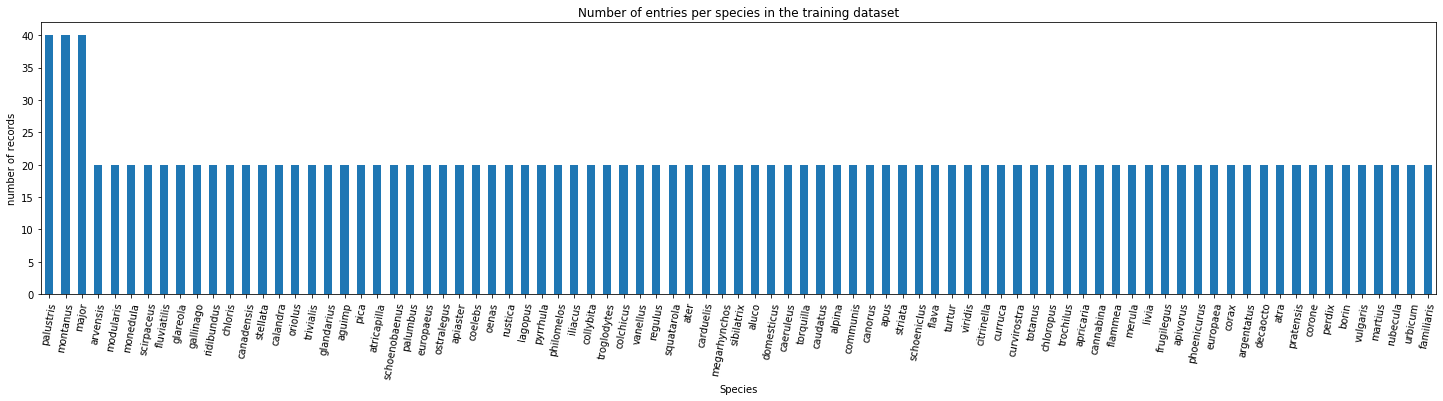

In [192]:
fig, ax = plt.subplots(figsize=(25,5))
train_df['species'].value_counts().plot.bar(ax=ax)
plt.title("Number of entries per species in the training dataset" )
plt.xlabel('Species')
plt.xticks(rotation=80)
plt.ylabel('number of records');
plt.show

In [49]:
f"There are {len(train_df.species.unique())} species in the training dataset"

'There are 85 species in the training dataset'

In [46]:
len(train_df.species.unique())

85

##  It looks like there are more than 20 records for species
but closer inpection shows that in fact there are 20 records per each. We must cont the full name for a specie, that is the genus + species

In [50]:
train_df['full_sp_name'] = train_df['genus'] + '_' + train_df['species']
test_df['full_sp_name'] = test_df['genus'] + '_' + test_df['species']

<function matplotlib.pyplot.show(*args, **kw)>

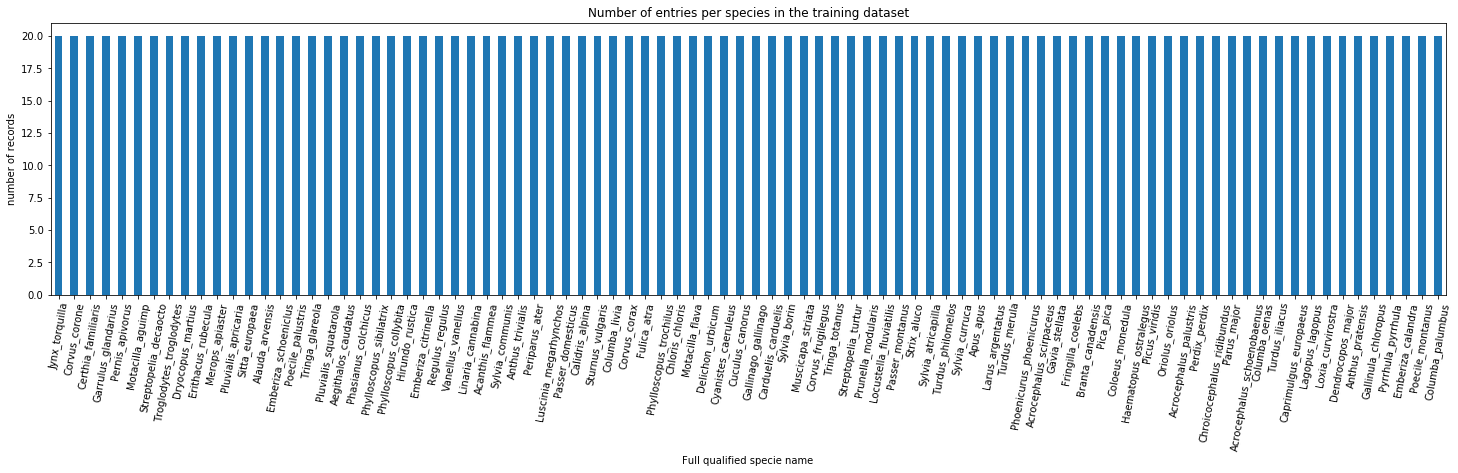

In [57]:
fig, ax = plt.subplots(figsize=(25,5))
train_df['full_sp_name'].value_counts().plot.bar(ax=ax)
plt.title("Number of entries per species in the training dataset" )
plt.xlabel('Full qualified specie name')
plt.xticks(rotation=80)
plt.ylabel('number of records');
plt.show

In [300]:
len(train_df.full_sp_name.unique())

88

## Inspect Genera distribution

<function matplotlib.pyplot.show(*args, **kw)>

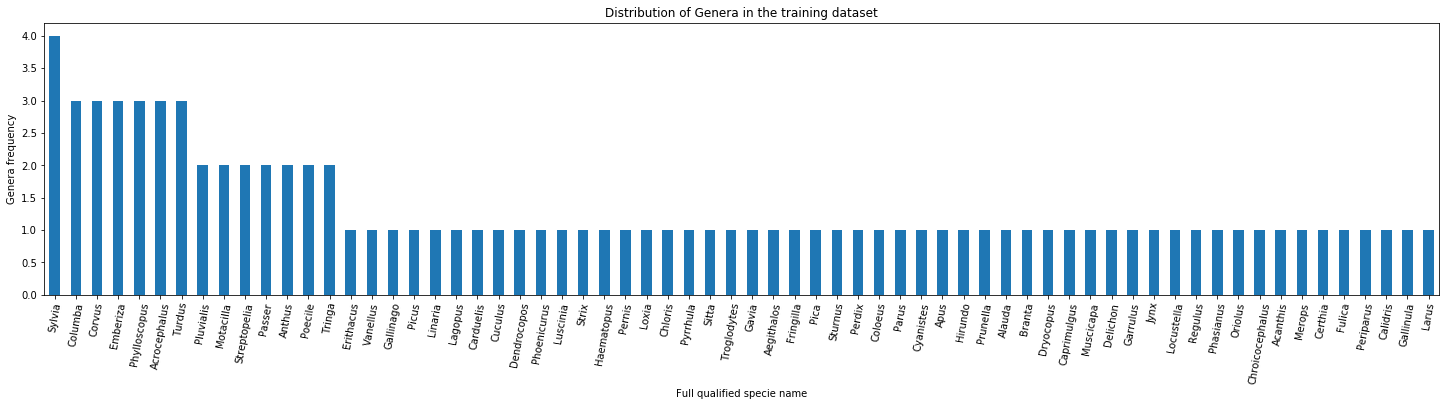

In [66]:
fig, ax = plt.subplots(figsize=(25,5))
(train_df['genus'].value_counts()/20).plot.bar(ax=ax)# Diveide by number of records
plt.title("Distribution of Genera in the training dataset" )
plt.xlabel('Full qualified specie name')
plt.xticks(rotation=80)
plt.ylabel('Genera frequency');
plt.show

In [65]:
f"There are {len(train_df.genus.unique())} different genus in the training dataset"

'There are 66 different genus in the training dataset'

## Scale/standarize dataset and encode the label

In [124]:
scaler = preprocessing.StandardScaler()# Declare an instance of the transformer/scaler
scaler.fit(train_df[features])# Compute the transformation

train_df[features] = pd.DataFrame(scaler.transform(train_df[features]), columns=features)# Transform (scale) the features on the train_df
test_df[features] = pd.DataFrame(scaler.transform(test_df[features]), columns=features)# Transform (scale) the features on the test_df

X = train_df[features].values
y_raw = train_df['full_sp_name'].values

le = preprocessing.LabelEncoder()# *** Help normalize labels (numeric or in this case strings) such that they contain only values between 0 and n_classes-1

y = le.fit_transform(y_raw)# Transform autput labels to numeric values.

X_test = test_df[features].values
y_raw_test = test_df['full_sp_name'].values

y_test = le.transform(y_raw_test)



In [125]:
X.shape

(1760, 169)

In [126]:
y_raw.shape

(1760,)

## Use PCA to show the dataset in a reduced space dimension

Explained variance ratio:  [0.198 0.115 0.106 0.064 0.045 0.038 0.028 0.022 0.020 0.019 0.017 0.016
 0.015 0.014 0.014 0.012 0.011 0.010 0.010 0.009 0.009 0.008 0.008 0.008
 0.007 0.007 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.004
 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000

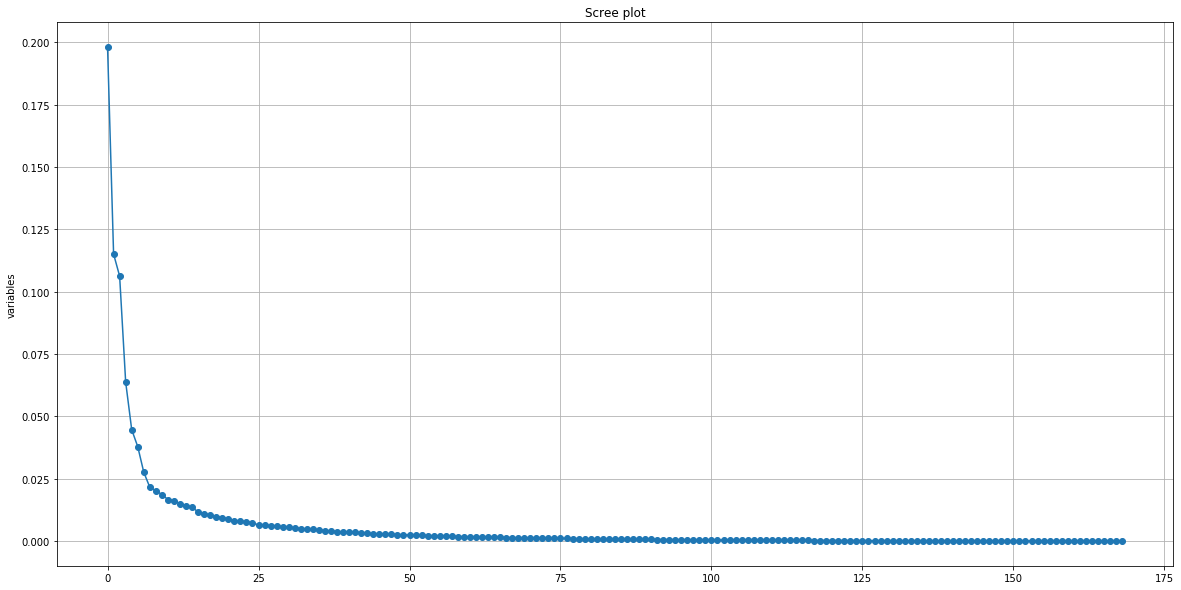

In [127]:
pca=PCA()
X_pca = pca.fit(X)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_,'-o')
plt.title('Scree plot')
plt.ylabel('Percentage of explained variance')
plt.ylabel('variables')
plt.grid()
print('Explained variance ratio: ' ,pca.explained_variance_ratio_)
plt.show()

## Use umap (UMAP) to show the dataset in a reduced space dimension

In [182]:
X_umap = umap.UMAP(n_neighbors=125, min_dist=0.05, random_state=9991).fit_transform(X)



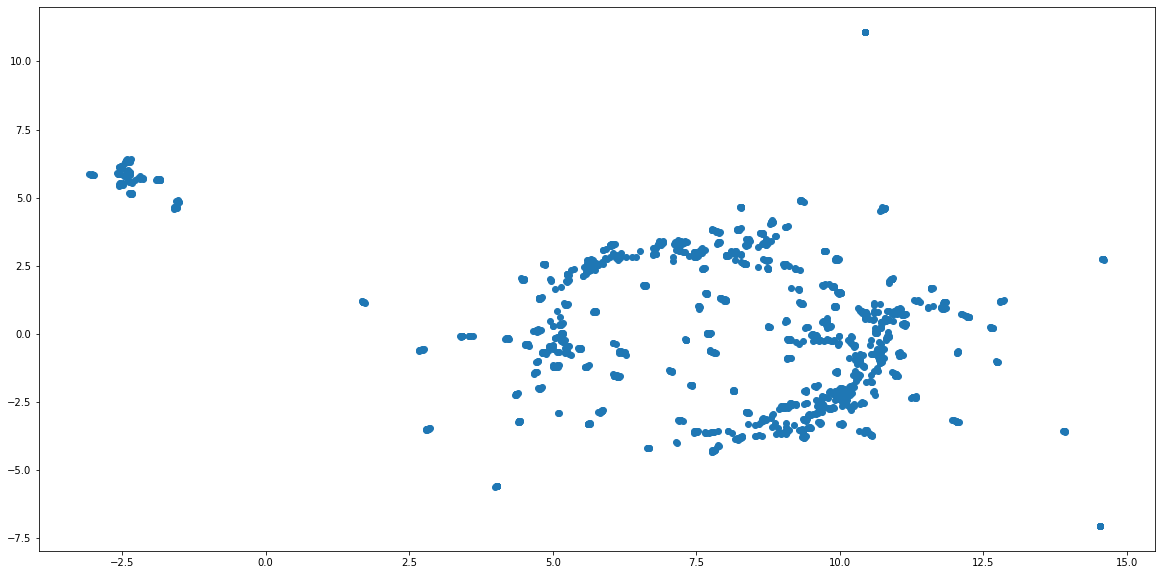

In [183]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X_umap[:,0], X_umap[:,1])
plt.show()

#### Use a helper function to visualize various parameters

In [286]:
def draw_umap(n_neighbors=15, min_dist=0.1, 
              n_components=2, metric='euclidean', 
              title='', plot_inx = 1):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=9991
    )
    u = fit.fit_transform(X);
#     fig, ax = plt.subplots(figsize=(20,10))
#     fig = plt.figure(figsize=(22, 10))
#     ax = fig1.add_subplot(5, 5, n + 1)
    if n_components == 1:
        ax = fig.add_subplot(3, 3, plot_inx)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(3, 3, plot_inx)
        ax.scatter(u[:,0], u[:,1], s=20)
    if n_components == 3:
        ax = fig.add_subplot(3, 3, plot_inx, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  s=20)
    plt.title(title, fontsize=18)


#### Exploring different neighbors

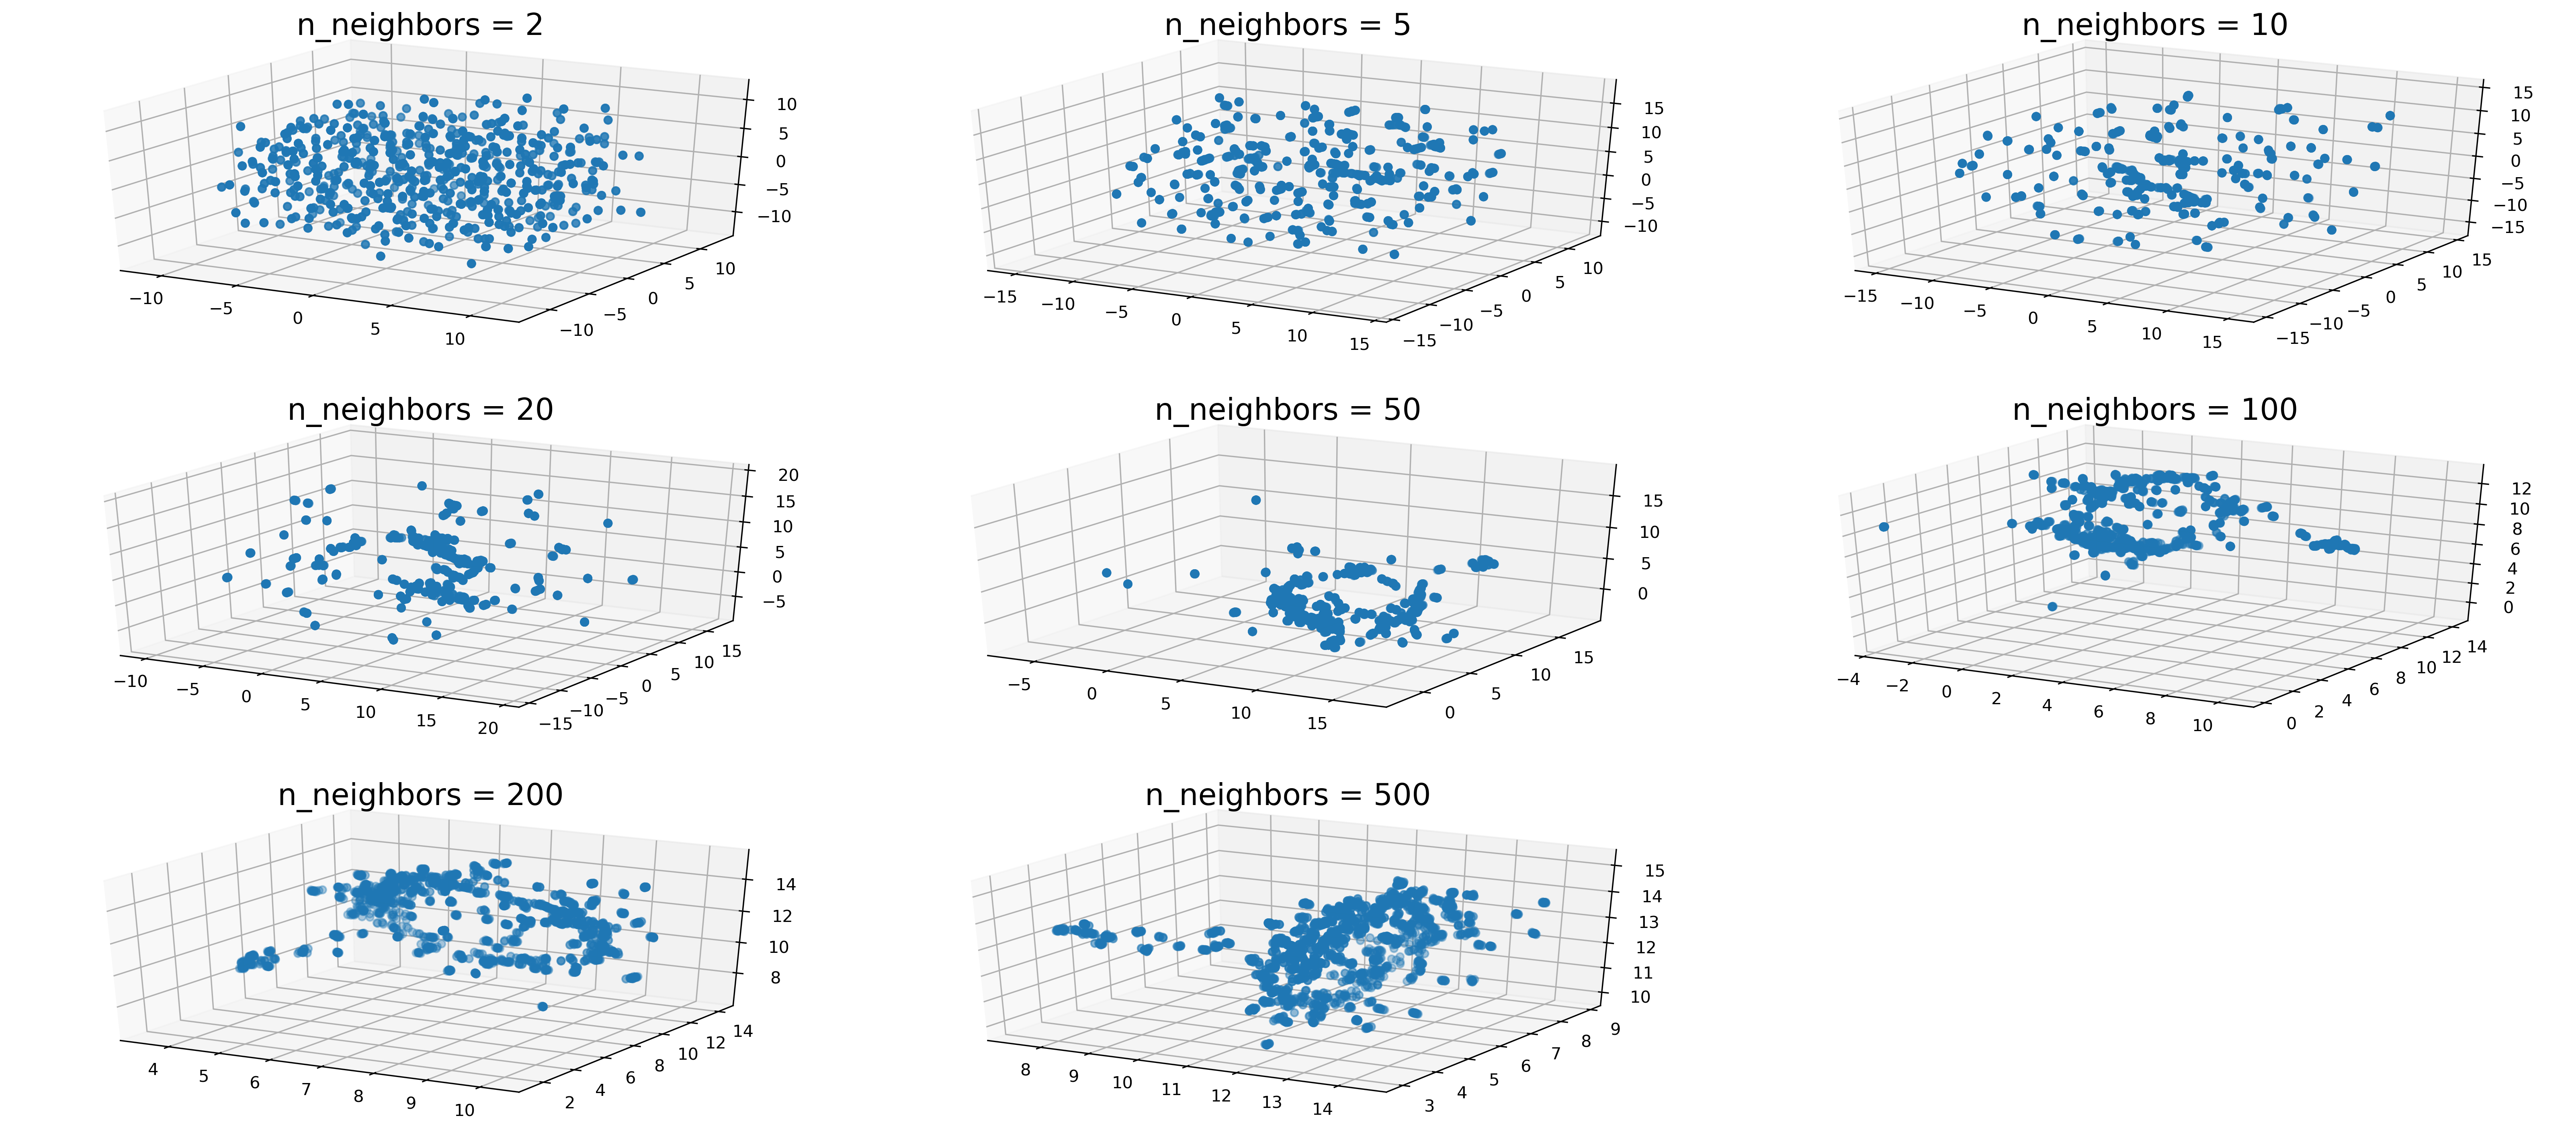

In [295]:
components = 3
neigbords = [2, 5, 10, 20, 50, 100, 200, 500]
fig = plt.figure(figsize=(22, 10), dpi = 300)

for i, n in enumerate(neigbords, start=1):
    draw_umap(n_neighbors=n, n_components= components, title='n_neighbors = {}'.format(n), plot_inx = i)

fig.tight_layout(pad=3)

#### Exploring different m_dist

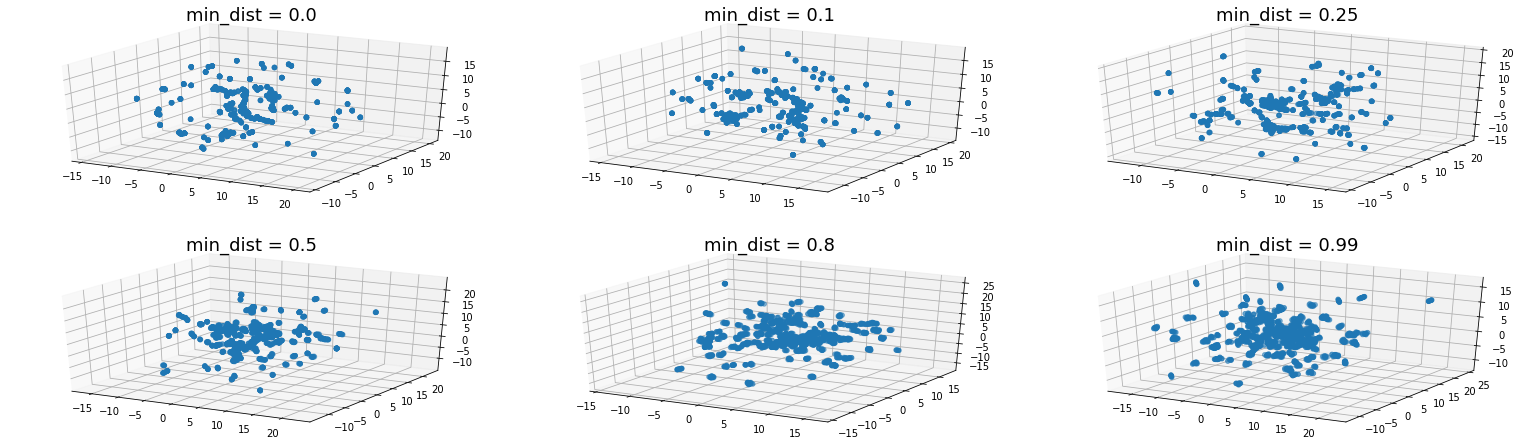

In [294]:
components = 3
distance = [0.0, 0.1, 0.25, 0.5, 0.8, 0.99]
fig = plt.figure(figsize=(22, 10), dpi = 300)

for i, d in enumerate(distance, start=1):
    draw_umap(min_dist=d, n_components= components, title='min_dist = {}'.format(d), plot_inx = i)

fig.tight_layout(pad=3)

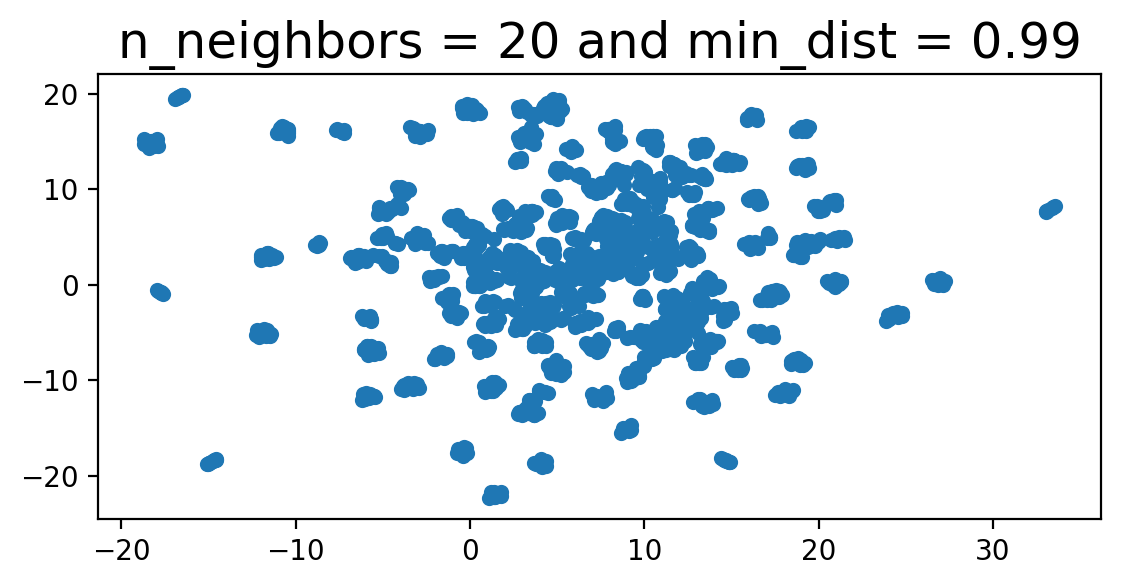

In [299]:
neighbors = 20
distance = 0.99
components = 2

fig = plt.figure(figsize=(22, 10), dpi = 200)

for n, d in (zip([neighbors], [distance])):
    draw_umap(n_neighbors=n, min_dist=d, n_components=components, title='n_neighbors = {} and min_dist = {}'.format(n, d))

## Use TSNE to show the dataset in a reduced space dimension

In [193]:
tsne_model = TSNE(perplexity=125, learning_rate=200, early_exaggeration=4.0,init='pca', 
                      n_iter=300, random_state=9999991, metric='euclidean', verbose=100 )

X_tsne = tsne_model.fit_transform(X)

[t-SNE] Computing 376 nearest neighbors...
[t-SNE] Indexed 1760 samples in 0.009s...
[t-SNE] Computed neighbors for 1760 samples in 0.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1760
[t-SNE] Computed conditional probabilities for sample 1760 / 1760
[t-SNE] Mean sigma: 7.050195
[t-SNE] Computed conditional probabilities in 0.204s
[t-SNE] Iteration 50: error = 12.9162388, gradient norm = 0.0033942 (50 iterations in 6.738s)
[t-SNE] Iteration 100: error = 12.9032135, gradient norm = 0.0016537 (50 iterations in 8.040s)
[t-SNE] Iteration 150: error = 12.8728600, gradient norm = 0.0034835 (50 iterations in 13.169s)
[t-SNE] Iteration 200: error = 12.8182354, gradient norm = 0.0047639 (50 iterations in 16.243s)
[t-SNE] Iteration 250: error = 13.0216646, gradient norm = 0.0001718 (50 iterations in 16.418s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 13.021665
[t-SNE] Iteration 300: error = 0.5227469, gradient norm = 0.0005917 (50 iterations in 19.

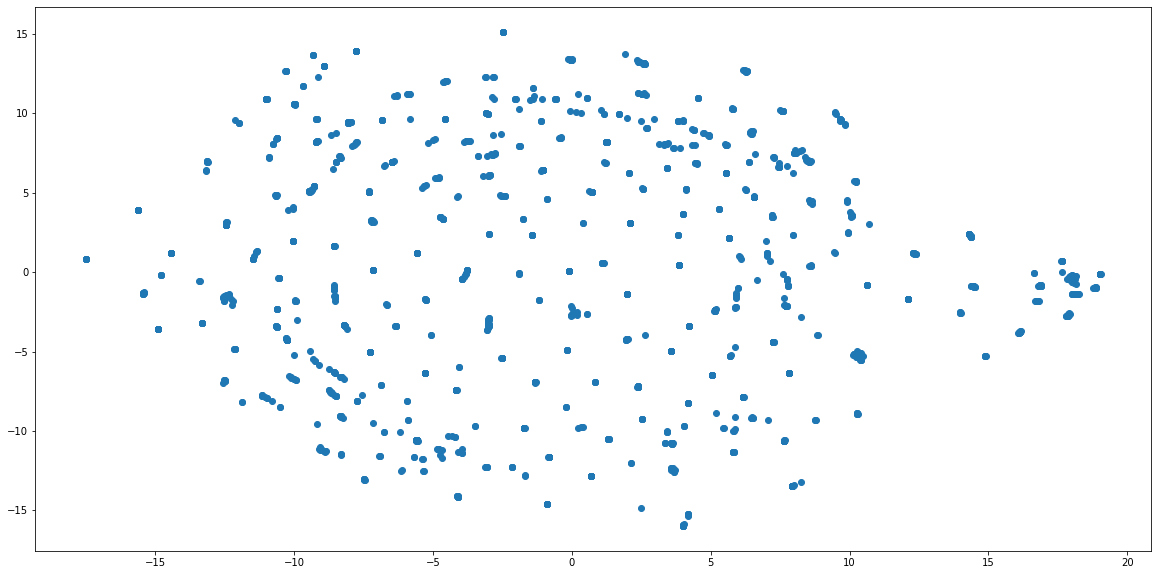

In [194]:
fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(X_tsne[:,0],X_tsne[:,1])
plt.show()